In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [7]:
titanic.dropna(subset=['age', 'embarked'], inplace=True)

In [8]:
titanic.isnull().sum().sort_values(ascending=False)

deck           530
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [9]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'who', 'deck'], drop_first=True) 

In [11]:
titanic.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'embark_town', 'alive', 'alone', 'sex_male', 'embarked_Q', 'embarked_S',
       'class_Second', 'class_Third', 'who_man', 'who_woman', 'deck_B',
       'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G'],
      dtype='object')

In [12]:
titanic.shape

(712, 23)

In [13]:
X = titanic.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis = 1)
y = titanic['survived']

In [14]:
# making correlation matrix of X
corr = X.corr() 


<Axes: >

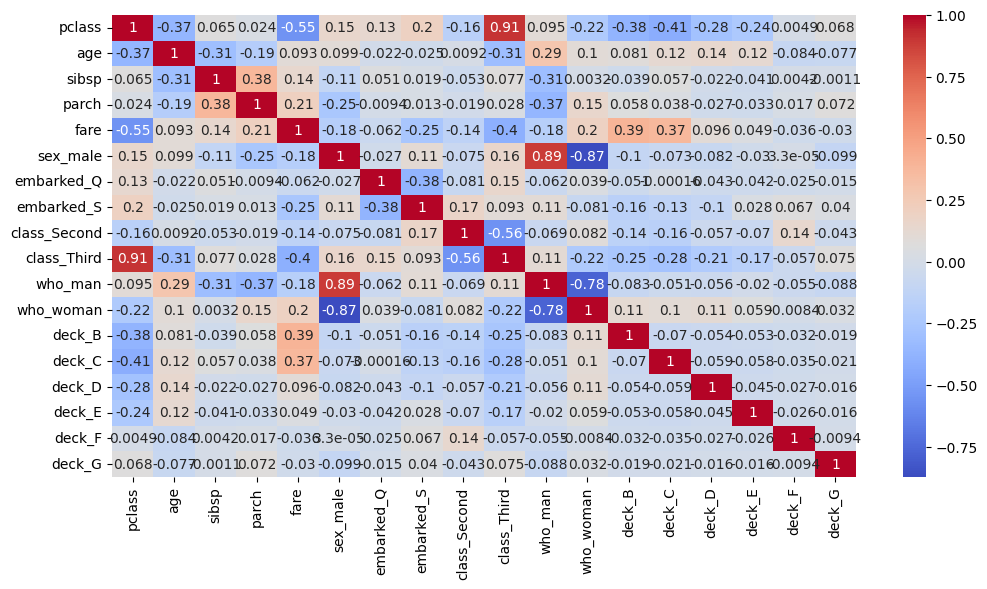

In [15]:
# heatmap of corr matrix
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train.shape

(569, 18)

## Building the Neural Network

In [19]:
import tensorflow as tf

input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1:]))

output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

model = tf.keras.models.Sequential([input_layer,
                                    output_layer])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
57/57 - 1s - 10ms/step - accuracy: 0.4482 - loss: 0.9163
Epoch 2/100
57/57 - 0s - 909us/step - accuracy: 0.6098 - loss: 0.6884
Epoch 3/100
57/57 - 0s - 910us/step - accuracy: 0.6819 - loss: 0.5886
Epoch 4/100
57/57 - 0s - 904us/step - accuracy: 0.7100 - loss: 0.5366
Epoch 5/100
57/57 - 0s - 877us/step - accuracy: 0.7381 - loss: 0.5043
Epoch 6/100
57/57 - 0s - 907us/step - accuracy: 0.7698 - loss: 0.4829
Epoch 7/100
57/57 - 0s - 909us/step - accuracy: 0.8049 - loss: 0.4678
Epoch 8/100
57/57 - 0s - 899us/step - accuracy: 0.8243 - loss: 0.4556
Epoch 9/100
57/57 - 0s - 832us/step - accuracy: 0.8348 - loss: 0.4443
Epoch 10/100
57/57 - 0s - 868us/step - accuracy: 0.8348 - loss: 0.4344
Epoch 11/100
57/57 - 0s - 1ms/step - accuracy: 0.8366 - loss: 0.4241
Epoch 12/100
57/57 - 0s - 915us/step - accuracy: 0.8383 - loss: 0.4151
Epoch 13/100
57/57 - 0s - 816us/step - accuracy: 0.8401 - loss: 0.4069
Epoch 14/100
57/57 - 0s - 919us/step - accuracy: 0.8418 - loss: 0.4010
Epoch 15/100
57/57

In [21]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss and Accuracy: {loss} & {accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8122 - loss: 0.4834 
Test Loss and Accuracy: 0.5132097005844116 & 0.7972028255462646


Text(0.5, 0, 'epoch')

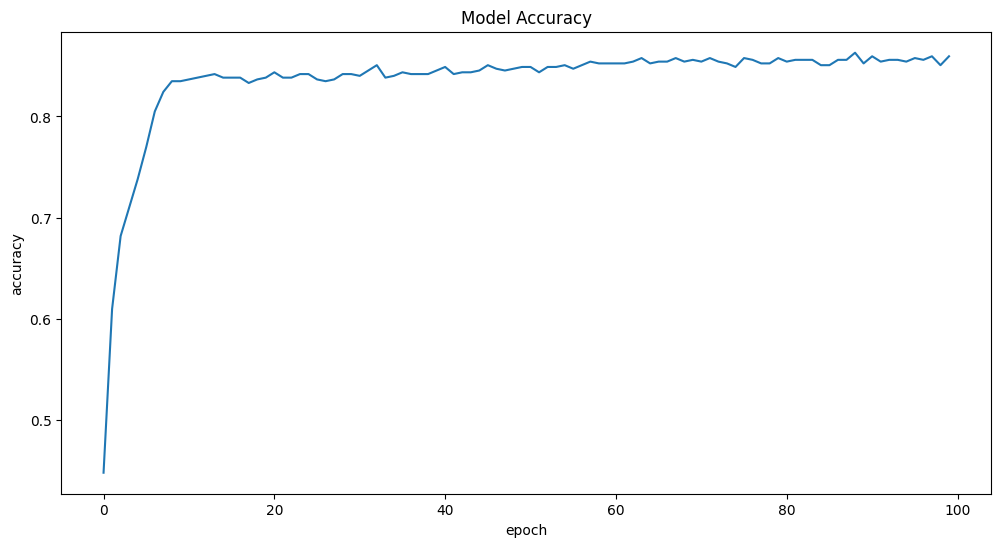

In [22]:
# plot epochs vs accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])   
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')


In [23]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Windows-10-10.0.22631-SP0
Tensor Flow Version: 2.16.1

Python 3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
Pandas 2.2.2
Scikit-Learn 1.5.1
SciPy 1.14.1
GPU is NOT AVAILABLE


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [1]:
import tensorflow as tf